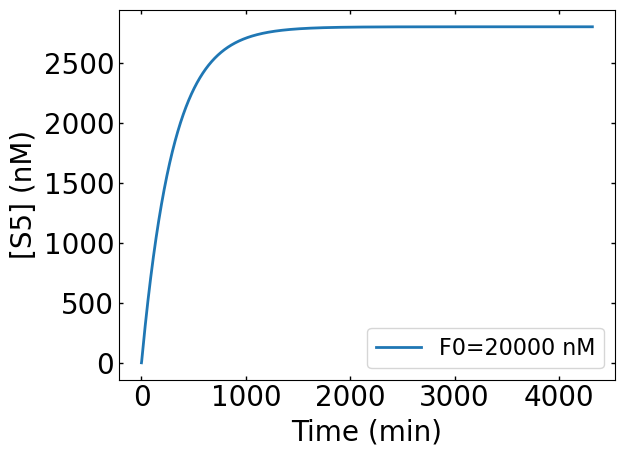

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pandas as pd

# Define function for the Ribozyme kinetic reaction
def Ribozyme_kinetics(y, t, k_hyb1, k_c1, k_l1, k_c2, k_l2, k_hyb2, k_ex1, k_sca, k_hyb3, k_ex2, k_tot, k_toe):
    S, R, SR, ScR, S5R, F, SF, S3F, S3, S5 = y
    dSdt = -k_hyb1*S*R - k_hyb2*S*F - k_ex2*S5R*S - k_tot*S*ScR
    dRdt = -k_hyb1*S*R - k_ex1*SF*R - k_hyb3*S5*R
    dSRdt = k_hyb1*S*R - k_c1*0.57*SR + k_l1*0.57*ScR - k_c2*0.43*SR + k_l2*0.43*ScR + k_ex1*SF*R + k_ex2*S5R*S + k_toe*S5R*SF
    dScRdt = k_c1*0.57*SR - k_l1*0.57*ScR + k_c2*0.43*SR - k_l2*0.43*ScR - k_sca*ScR*F
    dS5Rdt = k_sca*ScR*F + k_hyb3*S5*R - k_ex2*S5R*S - k_toe*S5R*SF
    dS5dt = -k_hyb3*S5*R + k_ex2*S5R*S + k_toe*S5R*SF + k_tot*S*ScR
    dFdt = -k_hyb2*S*F + k_ex1*SF*R - k_sca*ScR*F + k_toe*S5R*SF
    dSFdt = k_hyb2*S*F - k_ex1*SF*R - k_toe*S5R*SF
    dS3Fdt = k_sca*ScR*F
    dS3dt = k_tot*S*ScR
    return [dSdt, dRdt, dSRdt, dScRdt, dS5Rdt, dFdt, dSFdt, dS3Fdt, dS3dt, dS5dt]

# Initial concentrations (excluding F0)
S0 = 3000  # Initial substrate concentration
R0 = 200   # Initial ribozyme concentration
SR0 = 0    # Initial Substrate-ribozyme complex concentration
ScR0 = 0   # Initial cleaved product-ribozyme complex concentration
S5R0 = 0   # Initial S5R complex concentration
SF0 = 0    # Initial Sub-Sca complex concentration
S3F0 = 0   # Initial 3' end product-Sca complex concentration
S30 = 0    # Initial 3' end product concentration
S50 = 0    # Initial 5' end product concentration

# Rate constants
k_hyb1 = 3.5e6/1e9 * 60  # hybridization rate constant between substrate and ribozyme
k_c1 = 2.59 # hammerhead ribozyme cleavage rate (min^-1)
k_l1 = 0.052  # hammerhead ribozyme ligation rate (min^-1)
k_c2 = 0.14 # second hammerhead cleavage rate (min^-1)
k_l2 = 0.0028 # second hammerhead ribozyme ligation rate (min^-1)
k_hyb2 = 1e6/1e9 * 60  # hybridization rate constant 2 between substrate and scavenger
k_ex1 = 1e6/1e9 * 60  # exchange reaction rate constant from SF + R -> SR + F
k_sca = 5e4/1e9 * 60  # scavenging rate constant like strand displacement
k_hyb3 = 1e6/1e9 * 60  # hybridization rate constant 3 between 5' end product and ribozyme
k_ex2 = 1e4/1e9 * 60 # exchange reaction rate constant from S5R + S -> SR + S5
k_tot = 6.8/1e9 * 60 # total replacement rate
k_toe = 2.85e2/1e9 * 60 # exchange reaction rate constant from S5R + SF -> SR + F + S5

# Defining reaction time
t = np.linspace(0, 4320, 4321)  # Time interval of the reaction between 0 and 300 minutes.

# Data storage
data = {'Time (min)': t}
F0_list = [20000]  # List of initial scavenger concentrations

# Running ribozyme reaction simulation
for F0 in F0_list:
    y0 = [S0, R0, SR0, ScR0, S5R0, F0, SF0, S3F0, S30, S50]  # Update y0 with the current F0 value
    Results = odeint(Ribozyme_kinetics, y0, t, args=(k_hyb1, k_c1, k_l1, k_c2, k_l2, k_hyb2, k_ex1, k_sca, k_hyb3, k_ex2, k_tot, k_toe))
    S5output = Results[:, -1]
    data[f'S5 (F0={F0} nM)'] = S5output

# Convert the list to a DataFrame
time = t.tolist()
df = pd.DataFrame({'time': time, 'Output': S5output})

# Save the DataFrame to an Excel file
file_path = 'FILE NAME.xlsx'
df.to_excel(file_path, index=False)

# Plotting the dose-response curves
lw = 2
fs = 20

fig, ax1 = plt.subplots()

# Plotting the results
for F0 in F0_list:
    plt.plot(t, data[f'S5 (F0={F0} nM)'], label=f'F0={F0}' + " nM", linewidth=lw)

# Customize the plot
plt.xlabel('Time (min)', fontsize=fs)
plt.ylabel('[S5] (nM)', fontsize=fs)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
ax1.xaxis.set_tick_params(which='both', size=3, width=1, direction='in', top='on')
ax1.yaxis.set_tick_params(which='both', size=3, width=1, direction='in', right='on')
plt.legend(fontsize=fs-4)

# Show the plot
plt.show()

